In [1]:
# Import radial_velocity_functions :: Run this to reimport without having to restart the whole notebook
import radial_velocity_functions
import importlib
importlib.reload(radial_velocity_functions)
from radial_velocity_functions import *

In [3]:
# Import calibration functions :: Run this to reimport without having to restart the whole notebook
import calibration_functions
importlib.reload(calibration_functions)
from calibration_functions import *

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm as tqdm
from tqdm import tqdm
import pandas as pd
from datetime import datetime
from scipy.interpolate import interp1d

plt.rcParams['font.size'] = 16
plt.rc("font", family="serif")

from os import walk

In [85]:
def shift(key, array):
    return array[-key:] + array[:-key]

In [114]:
filenames = get_spectra_filenames_without_duplicate_dates(SPECTRA_PATH_51PEG)
o1 = prepare_orders(filenames[0], angstrom=True, is_peg_51=True)

791


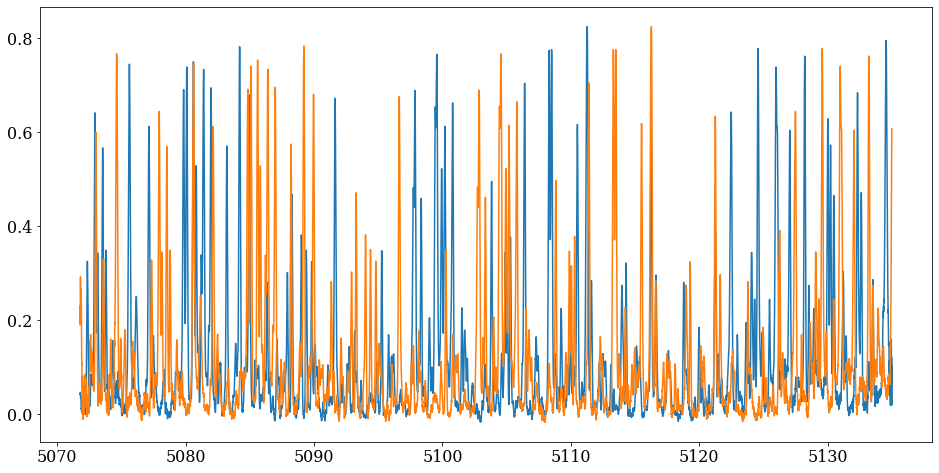

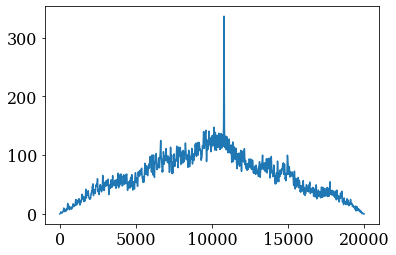

In [137]:



filenames = get_spectra_filenames_without_duplicate_dates(SPECTRA_PATH_51PEG)

o1 = prepare_orders(filenames[0], angstrom=True, is_peg_51=True)
o1 = o1[o1.order == 40]


f1 = interp1d(o1.x, o1.y, kind='linear', fill_value="extrapolate")
x_shifted = o1.x + 5
f2 = interp1d(x_shifted, o1.y, kind='cubic', fill_value="extrapolate")

xmin = max([min(o1.x), min(x_shifted)])
xmax = min([max(o1.x), max(x_shifted)])
xnew = np.linspace(xmin, xmax, 10000)
y1 = f1(xnew)
y2 = f2(xnew)


plt.figure(figsize=(16,8))
plt.plot(xnew, y1)
plt.plot(xnew, y2)
# plt.xlim(5080, 5085)

corr = np.correlate(y1, y2, mode='full')
corr = np.flip(corr)
lag = corr.argmax() - (len(y1) - 1)
print(lag)

plt.figure()
plt.plot(corr)


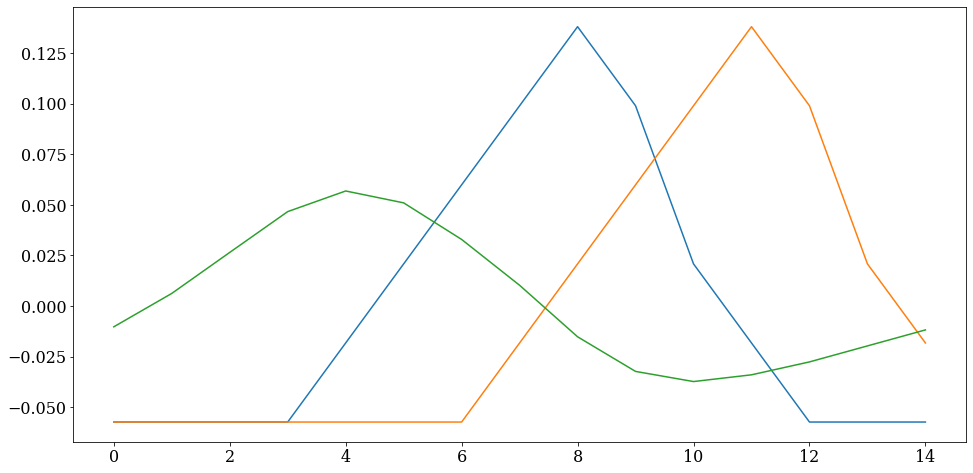

In [42]:
def shift(key, array):
    return array[-key:] + array[:-key]


plt.figure(figsize=(16,8))

a = [0, 0, 0, 0, 1, 2, 3, 4, 5, 4, 2, 1, 0, 0, 0]
# b = [0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 4, 2, 1, 0]
b = shift(3, a)

a = (a - np.mean(a)) / (np.std(a) * len(a))
b = (b - np.mean(b)) / (np.std(b) * len(b))
plt.plot(a)
plt.plot(b)
c = np.correlate(a, b, "same")

plt.plot(c)

# np.correlate(x, x2)



4


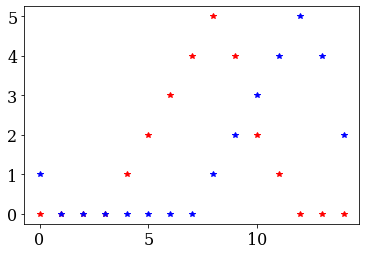

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# data_1 = np.sin(np.linspace(0, 10, 100))

# data_2 = np.concatenate([np.random.uniform(0, 1, 100), data_1 + np.random.uniform(0, 1, len(data_1)), np.random.uniform(0, 1, 150)])

data_1 = [0, 0, 0, 0, 1, 2, 3, 4, 5, 4, 2, 1, 0, 0, 0]
data_2 = shift(4, data_1)

corr = np.correlate(data_1, 
                    data_2,
                    mode='full')


corr = np.flip(corr)

lag = corr.argmax() - (len(data_1) - 1)

print(lag)



plt.plot(data_1, 'r*')
plt.plot(data_2, 'b*')
plt.show()

In [13]:
from scipy import signal
from scipy import misc
rng = np.random.default_rng()
face = misc.face(gray=True) - misc.face(gray=True).mean()
template = np.copy(face[300:365, 670:750])  # right eye
template -= template.mean()
face = face + rng.standard_normal(face.shape) * 50  # add noise

# corr = signal.correlate2d(face, template, boundary='symm', mode='same')
# y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
# import matplotlib.pyplot as plt
# fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
#                                                     figsize=(6, 15))
# ax_orig.imshow(face, cmap='gray')
# ax_orig.set_title('Original')
# ax_orig.set_axis_off()
# ax_template.imshow(template, cmap='gray')
# ax_template.set_title('Template')
# ax_template.set_axis_off()
# ax_corr.imshow(corr, cmap='gray')
# ax_corr.set_title('Cross-correlation')
# ax_corr.set_axis_off()
# ax_orig.plot(x, y, 'ro')
# fig.show()

array([[ 53.8713675 , 148.50708445,   7.47184854, ...,  56.97848196,
         11.71954521,  71.66279613],
       [-55.83808029,  46.51328477,  49.62242337, ..., -30.81775366,
        -46.03671267,  97.08796243],
       [ 24.59689304, -67.69210675, -23.00101776, ...,  50.7606711 ,
         50.44469354,   9.78960282],
       ...,
       [-17.08289226, -46.18608377,  48.44566524, ..., -27.19766311,
         18.07800822,  30.22541935],
       [ -1.69415307, -14.72782088, -18.2631695 , ..., -35.87194448,
          9.91387889,  46.89187132],
       [  6.30388553, -75.54460953, -31.91675501, ...,  54.43418692,
         24.87539391,  35.12477582]])